<a href="https://colab.research.google.com/github/Yesn-t/TI_1_Practica2/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Amaro Lechuga Jashua Ricardo

**e-mail:** jashua.amaro3877@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [3]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [ ]:
#init
n_iter = 5
miu = 3.0
beta = 0
aux_domain = np.linspace(miu-5, miu+5, 400)

exponent_choice = []
Levy_array = []

fig_LF_2d = go.Figure()

for i in range(n_iter):
  Levy_exponent = np.random.rand()
  Levy_pdf = np.array([levy_stable.pdf(i, alpha=Levy_exponent, beta=beta, loc=miu) for i in aux_domain])

  fig_LF_2d.add_trace(go.Scatter(
        x = aux_domain,
        y = Levy_pdf,
        marker = dict(size=2),
        line = dict(width=2),
        mode = 'lines',
        name = 'Levy_' + str(Levy_exponent),
        showlegend = True
        ))

  Levy_array.append(Levy_pdf)



fig_LF_2d.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

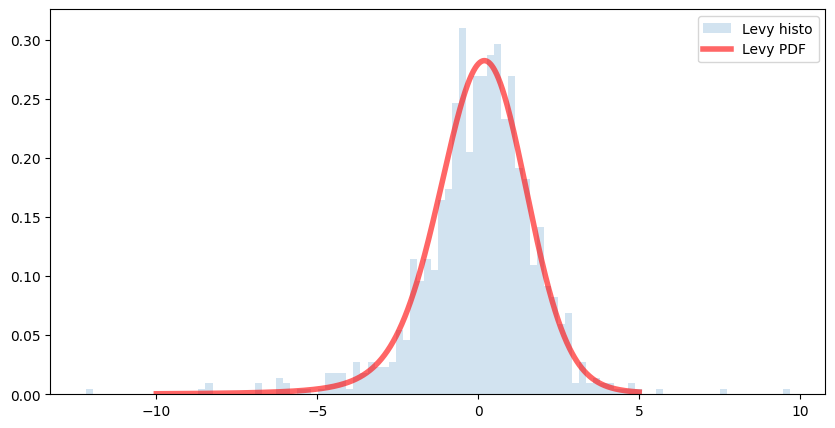

In [ ]:
alpha, beta = 1.8, -0.5
sample_size = 1000

x = np.linspace(-10, 5, sample_size)

Levy_pdf = np.array([levy_stable.pdf(i, alpha=alpha, beta=beta, loc=0) for i in x])
r = levy_stable.rvs(alpha, beta, size=sample_size)

fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.hist(r, bins=100, density=True, histtype='stepfilled', alpha=0.2, label='Levy histo')

ax.plot(x, Levy_pdf, 'r-', lw=4, alpha=0.6, label='Levy PDF')

ax.legend(loc='best')

plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

In [22]:
# Init parameters
CRW_exponent = 0.4
Levy_exponent = 1.9
beta = 0
n_steps = 200
s_pos = 0
speed = 5

# Init velocity vector
velocity = Vec2d(speed, 0)


# Brownian Walker Matrix
CRW_2d = np.ones(shape=(n_steps, 2))*s_pos


for i in range(1, n_steps):
  # Elegir el angulo de giro
  turn_angle = wrapcauchy.rvs(CRW_exponent)

  # Numero de pasos
  step = levy_stable.rvs(alpha=Levy_exponent, beta=beta, size=1)

  # Giro
  velocity = velocity.rotated(turn_angle)

  # Desplazamiento del caminador
  CRW_2d[i, 0] = CRW_2d[i-1, 0]+(velocity.x * step)
  CRW_2d[i, 1] = CRW_2d[i-1, 1]+(velocity.y * step)

# 3D
df = pd.DataFrame(dict(
    x_pos = CRW_2d[:, 0],
    y_pos = CRW_2d[:, 1],
    time = np.linspace(0, 1, n_steps),
    trace = [str('Lévy ﬂight') for i in range(n_steps)]
))

fig_wc_pdf_3d = px.line_3d(
    df, x='time', y='x_pos', z='y_pos', color='trace'
)

fig_wc_pdf_3d.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*

In [ ]:
# Init parameters
n_steps = 1000
s_pos = 0
speed = 5
n_traj = 6

# Init velocity vector
velocity = Vec2d(speed, 0)
x_pos_array = []
y_pos_array = []
time = []
CRW_exponent_array = []

# Brownian Walker Matrix
CRW_2d = np.ones(shape=(n_steps, 2))*s_pos

for i in range(n_traj):

  CRW_2d = np.ones(shape=(n_steps, 2))*s_pos
  CRW_exponent = np.random.rand()

  for i in range(1, n_steps):
    # Elegir el angulo de giro
    turn_angle = wrapcauchy.rvs(CRW_exponent)

    velocity = velocity.rotated(turn_angle)

    # Desplazamiento del caminador
    CRW_2d[i, 0] = CRW_2d[i-1, 0]+velocity.x
    CRW_2d[i, 1] = CRW_2d[i-1, 1]+velocity.y

  x_pos_array = np.append(x_pos_array, CRW_2d[:, 0])
  y_pos_array = np.append(y_pos_array, CRW_2d[:, 1])
  time = np.append(time, np.linspace(0, 1, n_steps))
  CRW_exponent_array = np.append(CRW_exponent_array, [str(CRW_exponent) for i in range(n_steps)])


# 3D
df = pd.DataFrame(dict(
    x_pos = x_pos_array,
    y_pos = y_pos_array,
    time = time,
    CRW_exponent = CRW_exponent_array
))

fig_wc_pdf_3d = px.line_3d(
    df, x='time', y='x_pos', z='y_pos', color='CRW_exponent'
)

fig_wc_pdf_3d.show()

# save dictionary to pickle file
with open('CRW_trajectory.pickle', 'wb') as file:
    pickle.dump(df, file, protocol=pickle.HIGHEST_PROTOCOL)